## ${\textbf{Libraries}}$

In [5]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

## ${\textbf{Exploratory Data Analysis}}$

In [6]:
# Read the data from CSV file
df = pd.read_csv('../datasets/Customer/customer_segmentation_data.csv', sep = ',', index_col = False)

In [7]:
#descriptive statistics of the data
df.describe()

,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


In [8]:
# Make a copy of the original data frame as a good coding practice
df_segmentation = df.copy()

In [9]:
# Check for missing values
df_segmentation.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [10]:
# Fill missing values with zeroes.
df_segmentation = df_segmentation.fillna(0)

In [11]:
df_segmentation.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [12]:
df_segmentation.dtypes

minutes_watched    float64
CLV                float64
region               int64
channel              int64
dtype: object

### ${\textbf{Correlation Estimate}}$

In [13]:
df_segmentation.corr()

,minutes_watched,CLV,region,channel
minutes_watched,1.000000,0.114153,0.040100,-0.003718
CLV,0.114153,1.000000,-0.273312,-0.026359
region,0.040100,-0.273312,1.000000,0.015098
channel,-0.003718,-0.026359,0.015098,1.000000


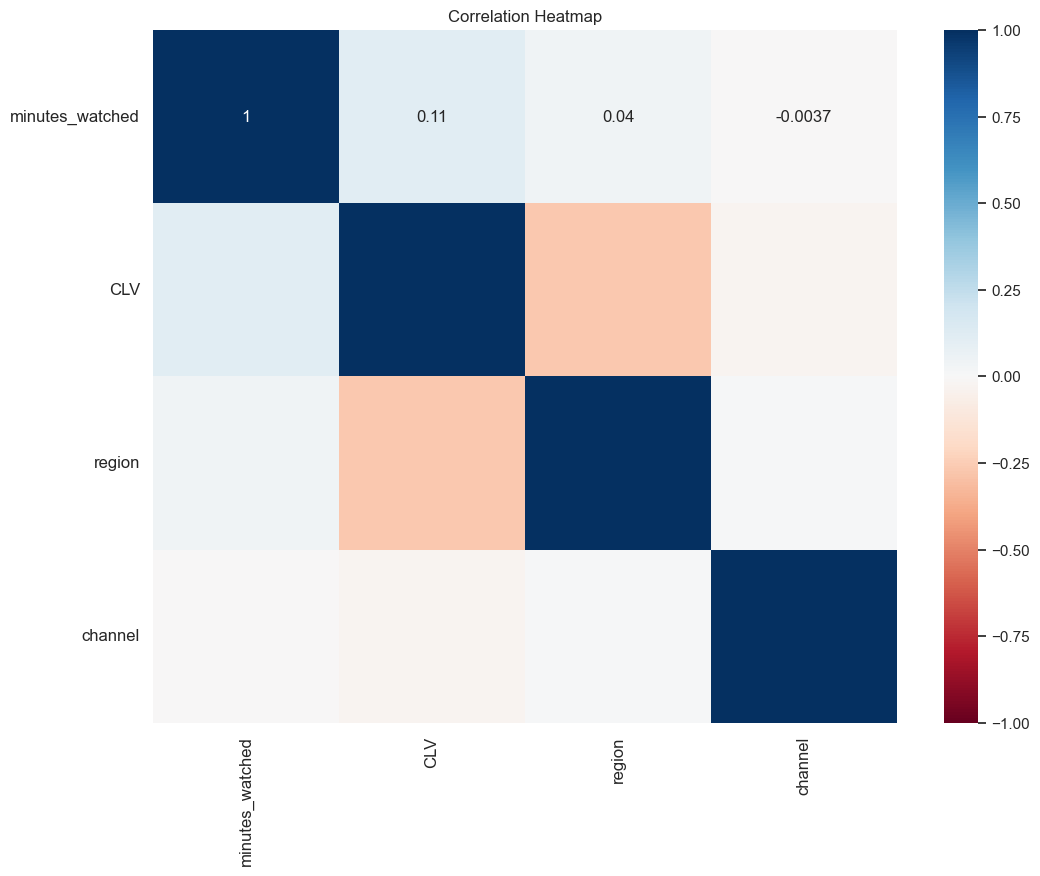

In [14]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.savefig('corr.png')
plt.show()

### ${\textbf{Visualize Raw Data}}$

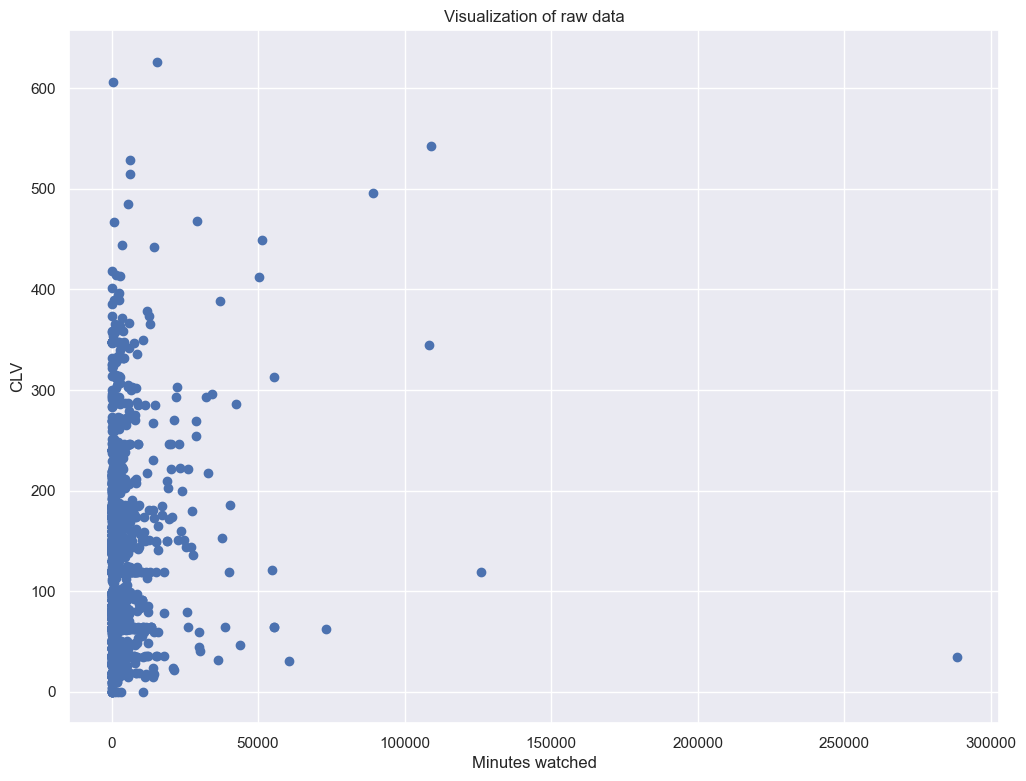

In [15]:
# Setting the size of the plot
plt.figure(figsize = (12, 9))

# Plotting a scatter plot using the first and second columns of the dataframe `df_segmentation`
plt.scatter(df_segmentation.iloc[:, 0], df_segmentation.iloc[:, 1])

# Labeling the x-axis as 'Minutes watched'
plt.xlabel('Minutes watched')

# Labeling the y-axis as 'CLV' (Customer Lifetime Value)
plt.ylabel('CLV')

# Providing a title for the plot
plt.title('Visualization of raw data')

# Saving the plot as a PNG image named 'scatter.png'
plt.savefig("scatter.png")

# Displaying the plot
plt.show()

### ${\textbf{Create Dummy Variables}}$

In [16]:
# create a list of the channels of acquisition variable
df_heard_from = df_segmentation['channel'] 

In [17]:
# create a list of the channels of the country variable
df_countries = df_segmentation['region'] 

In [18]:
# Get dummy variables for each unique value in 'channel'
df_dummies = pd.get_dummies(df['channel'].apply(pd.Series).stack())

# Use groupby on index and then sum the results
df_dummies = df_dummies.groupby(level=0).sum()

# Join the dummy variables to original dataframe
df = df.join(df_dummies)

In [19]:
# identical dummies for the channel of aquisition
segment_dummies = pd.get_dummies(df_heard_from, prefix = 'channel', prefix_sep = '_')
df_segmentation = pd.concat([df_segmentation, segment_dummies], axis = 1)

#df_pa = df_purchase_predictors

In [20]:
# Creating dummy variables for the `df_countries` dataframe. 
# Each column in `df_countries` will be prefixed with 'country_region_' in the new columns.
segment_dummies_2 = pd.get_dummies(df_countries, prefix = 'country_region', prefix_sep = '_')

# Appending the created dummy columns from `segment_dummies_2` to the `df_segmentation` dataframe.
df_segmentation = pd.concat([df_segmentation, segment_dummies_2], axis = 1)

In [21]:
# drop the channel variable as it is non-numerical and we'll not be able to perform the segmentation
df_segmentation = df_segmentation.drop(["channel"], axis = 1)

In [22]:
df_segmentation

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,False,False,True,False,False,False,False,False,True,False,False
3830,28.0,79.00,0,False,True,False,False,False,False,False,False,True,False,False
3831,57.0,36.00,2,False,True,False,False,False,False,False,False,False,False,True
3832,44.0,36.00,2,True,False,False,False,False,False,False,False,False,False,True


In [23]:
# rename the columns after adding the dummie variables
df_segmentation = df_segmentation.rename(columns = {'channel_1':'Google', 'channel_2':'Facebook', 'channel_3':'YouTube','channel_4':'LinkedIn', 
                                                    'channel_5':'Twitter', 'channel_6':'Instagram', 'channel_7':'Friend', 'channel_8':'Other',
                                                    'country_region_0':'Region_0','country_region_1':'Region_1','country_region_2':'Region_2'})

In [24]:
df_segmentation

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,Region_0,Region_1,Region_2
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,False,False,True,False,False,False,False,False,True,False,False
3830,28.0,79.00,0,False,True,False,False,False,False,False,False,True,False,False
3831,57.0,36.00,2,False,True,False,False,False,False,False,False,False,False,True
3832,44.0,36.00,2,True,False,False,False,False,False,False,False,False,False,True
